In [5]:
!pip install imutils

ERROR: Could not find a version that satisfies the requirement imutils
ERROR: No matching distribution found for imutils


In [8]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
#import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [9]:
dir = "../input/handwritten-characters/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [10]:
len(train_data)

140000

In [11]:
val_dir = "../input/handwritten-characters/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [12]:
len(val_data)

15209

In [13]:
random.shuffle(train_data)
random.shuffle(val_data)

In [14]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [15]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [16]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [17]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [18]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [19]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [20]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [21]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 128)         0

In [23]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [27]:
history = model.fit(train_X,train_Y, epochs=7, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/7
4375/4375 [==============================] - 121s 28ms/step - loss: 0.2185 - accuracy: 0.9213 - val_loss: 0.2256 - val_accuracy: 0.9234
Epoch 2/7
4375/4375 [==============================] - 121s 28ms/step - loss: 0.2123 - accuracy: 0.9238 - val_loss: 0.2307 - val_accuracy: 0.9126
Epoch 3/7
4375/4375 [==============================] - 122s 28ms/step - loss: 0.2059 - accuracy: 0.9260 - val_loss: 0.2330 - val_accuracy: 0.9216
Epoch 4/7
4375/4375 [==============================] - 122s 28ms/step - loss: 0.2047 - accuracy: 0.9255 - val_loss: 0.2212 - val_accuracy: 0.9266
Epoch 5/7
4375/4375 [==============================] - 121s 28ms/step - loss: 0.2002 - accuracy: 0.9271 - val_loss: 0.2487 - val_accuracy: 0.9131
Epoch 6/7
4375/4375 [==============================] - 122s 28ms/step - loss: 0.1966 - accuracy: 0.9291 - val_loss: 0.2408 - val_accuracy: 0.9142
Epoch 7/7
4375/4375 [==============================] - 122s 28ms/step - loss: 0.1923 - accuracy: 0.9297 - val_loss: 0.2367 -

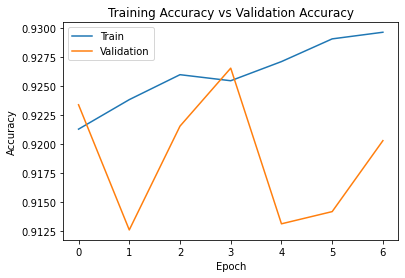

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

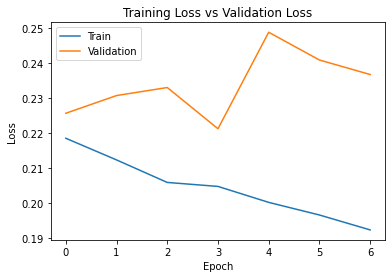

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
model.predict(val_X)

array([[4.0429538e-11, 4.1423024e-12, 5.6266932e-13, ..., 4.3268501e-17,
        3.6410416e-11, 2.4976492e-13],
       [6.1466630e-13, 1.6570417e-14, 8.9837426e-09, ..., 1.4258979e-10,
        5.7808733e-11, 5.1419247e-09],
       [3.3531997e-11, 4.3379346e-17, 4.6256560e-18, ..., 7.8128068e-20,
        5.7231728e-12, 3.7802501e-18],
       ...,
       [6.6739722e-07, 7.5387258e-10, 5.6950757e-11, ..., 3.9541269e-16,
        4.7841980e-10, 3.0557650e-11],
       [9.8155960e-14, 4.6425881e-09, 9.9996006e-01, ..., 2.1741739e-13,
        8.4852139e-11, 2.2875572e-07],
       [1.9015190e-11, 3.0978087e-09, 5.1387423e-12, ..., 1.4706296e-12,
        3.9066588e-08, 1.7129582e-11]], dtype=float32)

In [49]:
import numpy as np

# Assuming 'test_image_path' is the path to a single test image
test_image_path = "/kaggle/input/test-image/test.jpg"

# Read the test image
test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to the desired size (img_size x img_size)
img_size = 32
resized_image = cv2.resize(test_image, (img_size, img_size))

# Normalize the image data (optional, depends on the model)
normalized_image = resized_image / 255.0  # Assuming normalization is required

# Add a batch dimension to the input data
input_data = np.expand_dims(normalized_image, axis=0)

# Ensure that the input data has the correct shape
print("Input shape before reshaping:", input_data.shape)

# Reshape the input data to match the model's input requirements
input_data = np.expand_dims(input_data, axis=-1)

# Ensure that the input data has the correct shape after reshaping
print("Input shape after reshaping:", input_data.shape)


Input shape before reshaping: (1, 32, 32)
Input shape after reshaping: (1, 32, 32, 1)


In [50]:
# Pass the input data to the model for prediction
predictions = model.predict(input_data)
predictions

array([[0.0059744 , 0.06925291, 0.00902855, 0.00344749, 0.00057675,
        0.00800542, 0.00033497, 0.03018258, 0.00163402, 0.00058451,
        0.00281701, 0.01309347, 0.01518653, 0.0331931 , 0.00169068,
        0.01415153, 0.00751852, 0.00642694, 0.2424101 , 0.22147521,
        0.00315102, 0.09642211, 0.00406297, 0.01715908, 0.00669432,
        0.00489668, 0.01151156, 0.02245688, 0.0528307 , 0.01160428,
        0.04792804, 0.00457638, 0.00214377, 0.01570656, 0.01187106]],
      dtype=float32)

In [51]:
import pytesseract

In [52]:
# Perform OCR on the original image to extract text
extracted_text = pytesseract.image_to_string(test_image)

# Print the extracted text
print("Extracted Text:", extracted_text)

Extracted Text: Hallo Haxchita here

